In [143]:
import pandas as pd

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
file_path = '/content/drive/MyDrive/Makaan_Properties_Buy.csv'
data = pd.read_csv(file_path,encoding="latin-1")

**About Dataset\
This dataset was scraped from one of the housing website called as makaan.com. Makaan.com has quickly emerged as the preferred partner for consumers looking to rent, buy or sell a home. Makaan.com offers its online consumers maximum property options and has become one of the largest advertising platforms in online real estate in India.**

##Stage 2

1) Create a notebook -> read the found data there -> output the first 5 lines of the dataframe -> 2-3 sentences in a Markdown type cell, describing what kind of data, from where, what variables are there and short description of columns in a dataset in a bullet list.

Data preparation

In [173]:
data.head(5)

Property_Name  Property_id Property_type     Property_status  \
0               Arkiton Luxe     15446514     Apartment  Under Construction   
1  Keshav Akshar Ocean Pearl     15367414     Apartment  Under Construction   
2            Vishwa Opulence     14683118     Apartment       Ready to move   
3              Satyam Sarjan      5476295     Apartment       Ready to move   
4           Navkar Sunflower     15477040     Apartment  Under Construction   

  Price_per_unit_area   Posted_On  \
0               4,285   1 day ago   
1               7,000  2 days ago   
2               5,752  2 days ago   
3               2,486  5 days ago   
4               5,324  8 days ago   

                                         Project_URL   builder_id  \
0  https://www.makaan.com/ahmedabad/arkiton-life-...  100563465.0   
1  https://www.makaan.com/ahmedabad/keshav-naraya...  100009433.0   
2  https://www.makaan.com/ahmedabad/vishwa-develo...  100207731.0   
3  https://www.makaan.com/ahmedabad/satyam-develo...     101303.0   
4  https://www.makaan.com/ahmedabad/navkar-buildc...    1484209.0   

                  Builder_name Property_building_status  ...  is_furnished  \
0           Arkiton life Space                   ACTIVE  ...   Unfurnished   
1         Keshav Narayan Group                   ACTIVE  ...   Unfurnished   
2  Vishwa Developers Ahmedabad                   ACTIVE  ...   Unfurnished   
3            Satyam Developers                   ACTIVE  ...   Unfurnished   
4    Navkar Buildcon Ahmedabad                   ACTIVE  ...   Unfurnished   

  listing_domain_score is_plot  is_RERA_registered is_Apartment  \
0                  4.0   False                True         True   
1                  4.0   False                True         True   
2                  4.0   False               False         True   
3                  4.0   False               False         True   
4                  4.0   False                True         True   

   is_ready_to_move  is_commercial_Listing is_PentaHouse is_studio  \
0             False                  False         False     False   
1             False                  False         False     False   
2              True                  False         False     False   
3              True                  False         False     False   
4             False                  False         False     False   

   Listing_Category  
0              sell  
1              sell  
2              sell  
3              sell  
4              sell  

[5 rows x 32 columns]

In [174]:
df = data[["Property_type","Property_status","Price_per_unit_area","Posted_On","Property_building_status",
       "City_name","No_of_BHK","Size","is_furnished","Price",]]
df.head()

Property_type     Property_status Price_per_unit_area   Posted_On  \
0     Apartment  Under Construction               4,285   1 day ago   
1     Apartment  Under Construction               7,000  2 days ago   
2     Apartment       Ready to move               5,752  2 days ago   
3     Apartment       Ready to move               2,486  5 days ago   
4     Apartment  Under Construction               5,324  8 days ago   

  Property_building_status  City_name No_of_BHK         Size is_furnished  \
0                   ACTIVE  Ahmedabad     3 BHK  1,750 sq ft  Unfurnished   
1                   ACTIVE  Ahmedabad     4 BHK  3,384 sq ft  Unfurnished   
2                   ACTIVE  Ahmedabad     3 BHK  2,295 sq ft  Unfurnished   
3                   ACTIVE  Ahmedabad     2 BHK    918 sq ft  Unfurnished   
4                   ACTIVE  Ahmedabad     3 BHK  1,760 sq ft  Unfurnished   

         Price  
0    75,00,000  
1  2,36,88,000  
2  1,32,00,840  
3    22,83,000  
4    93,71,000

In [175]:
df.isnull().sum()

Property_type                   0
Property_status             60442
Price_per_unit_area             0
Posted_On                       0
Property_building_status        0
City_name                       0
No_of_BHK                       0
Size                            0
is_furnished                    0
Price                           0
dtype: int64

In [176]:
df.dropna( inplace=True)
df.isnull().sum()

<ipython-input-176-9ba1c9b24ee7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna( inplace=True)


Property_type               0
Property_status             0
Price_per_unit_area         0
Posted_On                   0
Property_building_status    0
City_name                   0
No_of_BHK                   0
Size                        0
is_furnished                0
Price                       0
dtype: int64

In [177]:
df["Property_building_status"].value_counts()

ACTIVE        143994
UNVERIFIED    127534
INACTIVE         126
Name: Property_building_status, dtype: int64

In [178]:
dict = {
    "UNVERIFIED" : 0,
    "ACTIVE" : 1,
    "INACTIVE" : 2
}

df['Property_building_status'] = data['Property_building_status'].map(dict)

<ipython-input-178-ed20a586dbb6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Property_building_status'] = data['Property_building_status'].map(dict)


In [179]:
df["Property_type"].value_counts()

Apartment            188906
Residential Plot      33342
Independent Floor     22554
Independent House     13553
Villa                 13299
Name: Property_type, dtype: int64

In [180]:
dict = {
    "Apartment" : 0,
    "Residential Plot" : 1,
    "Independent Floor" : 2,
    "Independent House" : 3,
    "Villa" : 4
}

df['Property_type'] = data['Property_type'].map(dict)

<ipython-input-180-24aedece7504>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Property_type'] = data['Property_type'].map(dict)


In [181]:
df["Property_status"].value_counts()

Ready to move         179800
Under Construction     91854
Name: Property_status, dtype: int64

In [182]:
dict = {
    "Ready to move" : 0,
    "Under Construction" : 1
}
df['Property_status'] = data['Property_status'].map(dict)

<ipython-input-182-da2041079bb9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Property_status'] = data['Property_status'].map(dict)


In [183]:
df["is_furnished"].value_counts()

Unfurnished       185341
Semi-Furnished     72042
Furnished          14271
Name: is_furnished, dtype: int64

In [184]:
dict = {
    "Unfurnished" : 0,
    "Semi-Furnished" : 1,
    "Furnished" : 2
}

df['is_furnished'] = data['is_furnished'].map(dict)

<ipython-input-184-327ea140135a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_furnished'] = data['is_furnished'].map(dict)


In [185]:
df["City_name"].value_counts()

Mumbai       94203
Chennai      35967
Bangalore    34839
Delhi        34728
Hyderabad    28255
Kolkata      22742
Ahmedabad    11721
Lucknow       9199
Name: City_name, dtype: int64

In [186]:
dict = {
    "Mumbai" : 0,
    "Chennai" : 1,
    "Hyderabad" : 2,
    "Bangalore" : 3,
    "Lucknow" : 4,
    "Delhi" : 5,
    "Kolkata" : 6,
    "Ahmedabad" : 7
}

df['City_name'] = data['City_name'].map(dict)

<ipython-input-186-93c621b16243>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City_name'] = data['City_name'].map(dict)


In [187]:
df["Posted_days_ago"] = df["Posted_On"].str.split(" ").str[0].str.replace("a","1").str.replace("an","3").str.replace("1n","1")
df = df.drop(columns=["Posted_On"],axis = 1)

<ipython-input-187-64fae5b8f5be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Posted_days_ago"] = df["Posted_On"].str.split(" ").str[0].str.replace("a","1").str.replace("an","3").str.replace("1n","1")


In [188]:
df["Size"] = df["Size"].str.split(" ").str[0]

In [189]:
df["No_of_BHK"] = df["No_of_BHK"].str.split(" ").str[0]

In [190]:
df.head()

Property_type  Property_status Price_per_unit_area  \
0              0              1.0               4,285   
1              0              1.0               7,000   
2              0              0.0               5,752   
3              0              0.0               2,486   
4              0              1.0               5,324   

   Property_building_status  City_name No_of_BHK   Size  is_furnished  \
0                         1          7         3  1,750             0   
1                         1          7         4  3,384             0   
2                         1          7         3  2,295             0   
3                         1          7         2    918             0   
4                         1          7         3  1,760             0   

         Price Posted_days_ago  
0    75,00,000               1  
1  2,36,88,000               2  
2  1,32,00,840               2  
3    22,83,000               5  
4    93,71,000               8

1)The column called City_name contains the names of the city\
    "Mumbai" : 0,\
    "Chennai" : 1,\
    "Hyderabad" : 2,\
    "Bangalore" : 3,\
    "Lucknow" : 4,\
    "Delhi" : 5,\
    "Kolkata" : 6,\
    "Ahmedabad" : 7\
The data type is categorical\
2)The column called Price contains information about the cost of the premises and contains various numeric values.

The data type is numeric

 2) Apply 5 different filterings with one or several conditions. Make meaningful conclusions.
Example: Today we filtered the data and found that there were 55 women under the age of 18 on the Titanic (your conclusions should correlate with the topic of the project).

2.1

In [192]:
filtered1 = df[df['Price'] == df['Price'].min()]
filtered1

Property_type  Property_status Price_per_unit_area  \
291                 2              0.0               4,950   
460                 0              0.0               5,446   
592                 0              0.0               5,027   
1171                0              0.0               5,714   
1795                0              0.0               5,291   
...               ...              ...                 ...   
331083              0              0.0              17,241   
331345              0              0.0              10,204   
331371              0              0.0              17,094   
331523              0              0.0              14,285   
331541              0              0.0              10,256   

        Property_building_status  City_name No_of_BHK   Size  is_furnished  \
291                            0          7         4  2,020             1   
460                            1          7         3  1,836             2   
592                            0          7         3  1,989             2   
1171                           1          7         3  1,750             0   
1795                           0          7         3  1,890             2   
...                          ...        ...       ...    ...           ...   
331083                         1          0         1    580             1   
331345                         0          0         2    980             0   
331371                         0          0         1    585             1   
331523                         1          0         1    700             0   
331541                         1          0         2    975             2   

              Price Posted_days_ago  
291     1,00,00,000               2  
460     1,00,00,000               9  
592     1,00,00,000               4  
1171    1,00,00,000               4  
1795    1,00,00,000               9  
...             ...             ...  
331083  1,00,00,000               5  
331345  1,00,00,000               6  
331371  1,00,00,000               6  
331523  1,00,00,000               5  
331541  1,00,00,000               5  

[1748 rows x 10 columns]

The minimum cost of housing on the site makaan.com is 1,00,00,000

2.1

In [193]:
filtered2 = df.loc[(df['Property_type'] == 0) & (df['Property_building_status'] == 1)]

filtered2

Property_type  Property_status Price_per_unit_area  \
0                   0              1.0               4,285   
1                   0              1.0               7,000   
2                   0              0.0               5,752   
3                   0              0.0               2,486   
4                   0              1.0               5,324   
...               ...              ...                 ...   
332091              0              1.0               9,826   
332092              0              1.0               8,568   
332093              0              1.0               9,861   
332094              0              1.0               8,813   
332095              0              1.0               9,859   

        Property_building_status  City_name No_of_BHK   Size  is_furnished  \
0                              1          7         3  1,750             0   
1                              1          7         4  3,384             0   
2                              1          7         3  2,295             0   
3                              1          7         2    918             0   
4                              1          7         3  1,760             0   
...                          ...        ...       ...    ...           ...   
332091                         1          0         1    346             0   
332092                         1          0         1    426             0   
332093                         1          0         1    360             0   
332094                         1          0         2    590             0   
332095                         1          0         1    358             0   

              Price Posted_days_ago  
0         75,00,000               1  
1       2,36,88,000               2  
2       1,32,00,840               2  
3         22,83,000               5  
4         93,71,000               8  
...             ...             ...  
332091    34,00,000               4  
332092    36,50,000               4  
332093    35,50,000               4  
332094    52,00,000               4  
332095    35,29,577               4  

[131155 rows x 10 columns]

On the website makaan.com you can find apartments with which are still in the repair status in the amount of 131155

2.3

In [194]:
df['Size'] = df['Size'].astype(str).str.replace(',', '').astype(int)
df['No_of_BHK'] = df['No_of_BHK'].astype(int)

filtered3 = df.loc[(df['No_of_BHK'] == 2) & (df['Size'] > 2000)]

filtered3

Property_type  Property_status Price_per_unit_area  \
116                 4              1.0               1,111   
117                 4              1.0               1,185   
248                 4              0.0               2,629   
253                 4              0.0               2,800   
600                 0              0.0               2,647   
...               ...              ...                 ...   
327000              0              1.0               3,095   
327001              0              1.0               3,023   
327576              0              0.0               8,716   
328283              0              1.0               2,500   
330921              0              0.0               6,666   

        Property_building_status  City_name  No_of_BHK  Size  is_furnished  \
116                            1          7          2  9000             0   
117                            1          7          2  6750             0   
248                            1          7          2  2700             0   
253                            1          7          2  2250             0   
600                            0          7          2  2115             2   
...                          ...        ...        ...   ...           ...   
327000                         1          0          2  2100             0   
327001                         1          0          2  2150             0   
327576                         1          0          2  2065             0   
328283                         1          0          2  2800             0   
330921                         0          0          2  3000             2   

              Price Posted_days_ago  
116       99,99,000               2  
117       79,98,750               2  
248       71,00,000               3  
253       63,00,000               3  
600       56,00,000               4  
...             ...             ...  
327000    65,00,000               5  
327001    65,00,000               5  
327576  1,80,00,000               4  
328283    70,00,000               4  
330921  2,00,00,000               2  

[394 rows x 10 columns]

On the website makaan.com you can find a place with two rooms with a size of 2000. There are 394 of them

2.4

In [195]:
filtered4 = df[df['City_name'] == 1]['Price'].max()

filtered4

'99,99,600'

The maximum cost of a place in Chennai on the website makaan.com is 99,99,600

2.5

In [196]:
filtered_data = df[(df['Property_type'] == 0) & (df['No_of_BHK'] == 10) & (df['Property_building_status'] == 0) & (df['City_name'] == 5)]

filtered_data

Property_type  Property_status Price_per_unit_area  \
113080              0              0.0              51,207   

        Property_building_status  City_name  No_of_BHK  Size  is_furnished  \
113080                         0          5         10  5175             2   

               Price Posted_days_ago  
113080  26,50,00,000               1

We found apartments in the city of Delhi with renovation in which there are 10 rooms on the website makaan.com

3) Apply 3 different sortings by one or several columns. Make meaningful conclusions.
Example: Today we learned that the oldest person on the Titanic was 80 years old.

3.1

In [197]:
sorted_by_price_asc = df.sort_values(by='Price')
sorted_by_price_asc

Property_type  Property_status Price_per_unit_area  \
324640              0              1.0              12,515   
135579              0              0.0               6,666   
26924               0              0.0               7,132   
326516              0              0.0              13,333   
6234                0              0.0               5,037   
...               ...              ...                 ...   
318438              0              1.0              14,858   
141236              4              1.0               4,484   
258120              0              1.0              17,241   
322790              0              1.0              14,858   
141235              4              1.0               4,484   

        Property_building_status  City_name  No_of_BHK  Size  is_furnished  \
324640                         1          0          2   799             0   
135579                         0          2          2  1500             0   
26924                          1          3          3  1402             0   
326516                         1          0          1   750             1   
6234                           0          7          3  1985             1   
...                          ...        ...        ...   ...           ...   
318438                         1          0          2   673             1   
141236                         0          2          3  2230             0   
258120                         1          0          2   580             0   
322790                         1          0          2   673             1   
141235                         0          2          3  2230             0   

              Price Posted_days_ago  
324640  1,00,00,000               3  
135579  1,00,00,000               2  
26924   1,00,00,000              13  
326516  1,00,00,000               4  
6234    1,00,00,000               2  
...             ...             ...  
318438    99,99,999               2  
141236    99,99,999              24  
258120    99,99,999              15  
322790    99,99,999               3  
141235    99,99,999              23  

[271654 rows x 10 columns]

Here are the properties from the lowest to the highest price. Shows the most affordable options available on Makaan.com

3.2

In [198]:
sorted_by_size_bhk_desc = df.sort_values(by=['Size', 'No_of_BHK'], ascending=[False, False])
sorted_by_size_bhk_desc

Property_type  Property_status Price_per_unit_area  \
198957              1              0.0                 366   
41278               1              0.0                 528   
126421              1              0.0               2,295   
9951                1              0.0               2,148   
10584               1              0.0               1,432   
...               ...              ...                 ...   
200283              1              0.0                 699   
202592              1              0.0              69,900   
203729              1              0.0               6,990   
173121              1              0.0              13,333   
203678              1              0.0              11,650   

        Property_building_status  City_name  No_of_BHK     Size  is_furnished  \
198957                         0          4          0  2181501             0   
41278                          0          3          0   435600             0   
126421                         0          5          0   435600             0   
9951                           0          7          0   314136             0   
10584                          0          7          0   261780             0   
...                          ...        ...        ...      ...           ...   
200283                         0          4          0      100             0   
202592                         0          4          0      100             0   
203729                         0          4          0      100             0   
173121                         0          2          0       90             0   
203678                         0          4          0       60             0   

               Price Posted_days_ago  
198957  80,00,00,000              15  
41278   23,00,00,000               1  
126421  99,99,99,999               5  
9951    67,50,00,000               1  
10584   37,50,00,000               3  
...              ...             ...  
200283        69,900               5  
202592     69,90,000              10  
203729      6,99,000              23  
173121     12,00,000               5  
203678      6,99,000              23  

[271654 rows x 10 columns]

Sorting by size and number of bedrooms in descending order would give insight into the largest properties available in terms of size and the ones with the most bedrooms.

3.3

In [199]:
sorted_by_status_posted = df.sort_values(by=['Property_status', 'Posted_days_ago'])
sorted_by_status_posted

Property_type  Property_status Price_per_unit_area  \
11                  0              0.0               4,474   
29                  0              0.0               2,963   
74                  0              0.0               6,130   
131                 0              0.0               6,130   
149                 0              0.0               2,222   
...               ...              ...                 ...   
332066              0              1.0              58,110   
332067              0              1.0              58,141   
332068              0              1.0              58,110   
332069              0              1.0              50,163   
332070              0              1.0              58,110   

        Property_building_status  City_name  No_of_BHK  Size  is_furnished  \
11                             1          7          3  1989             0   
29                             1          7          3  1350             0   
74                             1          7          3  2349             0   
131                            1          7          3  2358             0   
149                            1          7          2  1080             0   
...                          ...        ...        ...   ...           ...   
332066                         1          0          2   721             0   
332067                         1          0          2   667             0   
332068                         1          0          2   635             0   
332069                         1          0          3   915             0   
332070                         1          0          2   764             0   

              Price Posted_days_ago  
11        89,00,000               1  
29        40,00,050               1  
74      1,43,99,370               1  
131     1,44,54,540               1  
149       23,99,760               1  
...             ...             ...  
332066  4,18,97,480               9  
332067  3,87,80,447               9  
332068  3,69,00,000               9  
332069  4,59,00,000               9  
332070  4,43,96,220               9  

[271654 rows x 10 columns]

This sort could provide a perspective on the newest properties available and their statuses, indicating the most recently listed properties based on their status.

4. Create frequency distributions for the categorical variables (with .value_counts() method) and numeric variables (using hist). Totally 5 frequency distributions. Comment on the results in a Markdown type cell.

In [200]:
property_type_freq = df['Property_type'].value_counts()
property_type_freq

0    188906
1     33342
2     22554
3     13553
4     13299
Name: Property_type, dtype: int64

In [201]:
property_status_freq = df['Property_status'].value_counts()
property_status_freq

0.0    179800
1.0     91854
Name: Property_status, dtype: int64

In [202]:
building_status_freq = df['Property_building_status'].value_counts()
building_status_freq

1    143994
0    127534
2       126
Name: Property_building_status, dtype: int64

In [203]:
furnished_status_freq = df['is_furnished'].value_counts()
furnished_status_freq

0    185341
1     72042
2     14271
Name: is_furnished, dtype: int64

In [204]:
city_listings_freq = df['City_name'].value_counts()
city_listings_freq

0    94203
1    35967
3    34839
5    34728
2    28255
6    22742
7    11721
4     9199
Name: City_name, dtype: int64

In [95]:
import matplotlib.pyplot as plt
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

KeyboardInterrupt: ignored

data is so big for hist

In [97]:
df=df.head(7000)

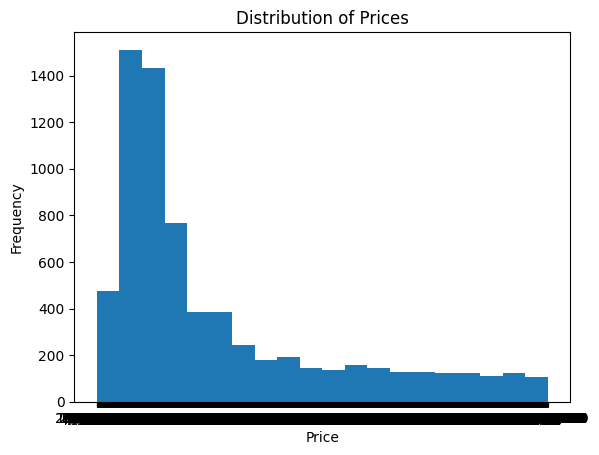

In [98]:
import matplotlib.pyplot as plt
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

The frequency distributions show that the majority of properties listed are of a certain type (e.g., apartments), with a significant number being ready-to-move properties. There are more active properties than inactive or unverified ones. Furnishing status shows a notable count in unfurnished listings. In terms of cities, there's a variation in property listings across different locations, with certain cities having higher listings than others. The price distribution indicates a skew towards lower-priced properties, with fewer listings at higher prices.


5) Create frequency distributions based on filtered data in the second point of the instructions (with .value_counts() method or histogram). Totally 5 frequency distributions. Comment on the results in a Markdown type cell.
Example: You have chosen only women from the data — look only in these data frequency tables for one / two variables. Then do the same for men and compare the results.

In [205]:
property_type_freq_filtered = filtered2['Property_type'].value_counts()
property_type_freq_filtered

0    131155
Name: Property_type, dtype: int64

In [206]:
building_status_freq_filtered = filtered2['Property_building_status'].value_counts()
building_status_freq_filtered

1    131155
Name: Property_building_status, dtype: int64

In [207]:
furnished_status_freq_filtered = filtered2['is_furnished'].value_counts()
furnished_status_freq_filtered

0    94421
1    30847
2     5887
Name: is_furnished, dtype: int64

In [208]:
city_listings_freq_filtered = filtered2['City_name'].value_counts()
city_listings_freq_filtered

0    71709
3    18695
6    11513
1     9143
2     6679
7     6195
5     6110
4     1111
Name: City_name, dtype: int64

The frequency distributions for the filtered data indicate more specific insights. For instance, after filtering for apartments under repair status, we observe a dominance of certain property types with a specific building status and furnishing type. The distribution of prices within this filtered data suggests a concentration within particular price ranges.


6) According to the available data, create your own 2-3 variables.
"Example: you have income information — recode it into two categories ""poor"" and ""rich"" by your own logic or some experts', see how many observations there are in each category."

In [209]:
df['Price'] = df['Price'].str.replace(',', '').astype(float)

df['Price_Category'] = pd.cut(
    df['Price'],
    bins=[0, 100000, 500000, df['Price'].max()],
    labels=['Affordable', 'Mid-range', 'Luxury'],
    include_lowest=True
)


In [210]:
df

Property_type  Property_status Price_per_unit_area  \
0                   0              1.0               4,285   
1                   0              1.0               7,000   
2                   0              0.0               5,752   
3                   0              0.0               2,486   
4                   0              1.0               5,324   
...               ...              ...                 ...   
332091              0              1.0               9,826   
332092              0              1.0               8,568   
332093              0              1.0               9,861   
332094              0              1.0               8,813   
332095              0              1.0               9,859   

        Property_building_status  City_name  No_of_BHK  Size  is_furnished  \
0                              1          7          3  1750             0   
1                              1          7          4  3384             0   
2                              1          7          3  2295             0   
3                              1          7          2   918             0   
4                              1          7          3  1760             0   
...                          ...        ...        ...   ...           ...   
332091                         1          0          1   346             0   
332092                         1          0          1   426             0   
332093                         1          0          1   360             0   
332094                         1          0          2   590             0   
332095                         1          0          1   358             0   

             Price Posted_days_ago Price_Category  
0        7500000.0               1         Luxury  
1       23688000.0               2         Luxury  
2       13200840.0               2         Luxury  
3        2283000.0               5         Luxury  
4        9371000.0               8         Luxury  
...            ...             ...            ...  
332091   3400000.0               4         Luxury  
332092   3650000.0               4         Luxury  
332093   3550000.0               4         Luxury  
332094   5200000.0               4         Luxury  
332095   3529577.0               4         Luxury  

[271654 rows x 11 columns]

In [211]:
df['Posted_days_ago'] = df['Posted_days_ago'].astype(int)

max_days_ago = df['Posted_days_ago'].max()

df['Age_Group'] = pd.cut(
    df['Posted_days_ago'],
    bins=[-1, 30, 90, max_days_ago + 100],
    labels=['New', 'Moderately Old', 'Old'],
    include_lowest=True
)


In [212]:
df

Property_type  Property_status Price_per_unit_area  \
0                   0              1.0               4,285   
1                   0              1.0               7,000   
2                   0              0.0               5,752   
3                   0              0.0               2,486   
4                   0              1.0               5,324   
...               ...              ...                 ...   
332091              0              1.0               9,826   
332092              0              1.0               8,568   
332093              0              1.0               9,861   
332094              0              1.0               8,813   
332095              0              1.0               9,859   

        Property_building_status  City_name  No_of_BHK  Size  is_furnished  \
0                              1          7          3  1750             0   
1                              1          7          4  3384             0   
2                              1          7          3  2295             0   
3                              1          7          2   918             0   
4                              1          7          3  1760             0   
...                          ...        ...        ...   ...           ...   
332091                         1          0          1   346             0   
332092                         1          0          1   426             0   
332093                         1          0          1   360             0   
332094                         1          0          2   590             0   
332095                         1          0          1   358             0   

             Price  Posted_days_ago Price_Category Age_Group  
0        7500000.0                1         Luxury       New  
1       23688000.0                2         Luxury       New  
2       13200840.0                2         Luxury       New  
3        2283000.0                5         Luxury       New  
4        9371000.0                8         Luxury       New  
...            ...              ...            ...       ...  
332091   3400000.0                4         Luxury       New  
332092   3650000.0                4         Luxury       New  
332093   3550000.0                4         Luxury       New  
332094   5200000.0                4         Luxury       New  
332095   3529577.0                4         Luxury       New  

[271654 rows x 12 columns]

##Stage 3

In [213]:
df

Property_type  Property_status Price_per_unit_area  \
0                   0              1.0               4,285   
1                   0              1.0               7,000   
2                   0              0.0               5,752   
3                   0              0.0               2,486   
4                   0              1.0               5,324   
...               ...              ...                 ...   
332091              0              1.0               9,826   
332092              0              1.0               8,568   
332093              0              1.0               9,861   
332094              0              1.0               8,813   
332095              0              1.0               9,859   

        Property_building_status  City_name  No_of_BHK  Size  is_furnished  \
0                              1          7          3  1750             0   
1                              1          7          4  3384             0   
2                              1          7          3  2295             0   
3                              1          7          2   918             0   
4                              1          7          3  1760             0   
...                          ...        ...        ...   ...           ...   
332091                         1          0          1   346             0   
332092                         1          0          1   426             0   
332093                         1          0          1   360             0   
332094                         1          0          2   590             0   
332095                         1          0          1   358             0   

             Price  Posted_days_ago Price_Category Age_Group  
0        7500000.0                1         Luxury       New  
1       23688000.0                2         Luxury       New  
2       13200840.0                2         Luxury       New  
3        2283000.0                5         Luxury       New  
4        9371000.0                8         Luxury       New  
...            ...              ...            ...       ...  
332091   3400000.0                4         Luxury       New  
332092   3650000.0                4         Luxury       New  
332093   3550000.0                4         Luxury       New  
332094   5200000.0                4         Luxury       New  
332095   3529577.0                4         Luxury       New  

[271654 rows x 12 columns]

In [214]:
price_mean = df['Price'].mean()
price_median = df['Price'].median()
price_mode = df['Price'].mode()

print(f"Price Mean: {price_mean}")
print(f"Price Median: {price_median}")
print(f"Price Mode: {price_mode}")

Price Mean: 18108407.23930441
Price Median: 7500000.0
Price Mode: 0    6500000.0
Name: Price, dtype: float64


Interpretation: These measures provide information about the central trend of real estate prices on the website. The average gives the average price, the median shows the midpoint, and the fashion indicates the most common price.

In [215]:
size_median = df['Size'].median()

print(f"Size Median: {size_median}")

Size Median: 1108.0


Interpretation: The median size provides a representative value less affected by extreme size values.

In [216]:
bhk_mode = df['No_of_BHK'].mode()

print(f"No_of_BHK Mode: {bhk_mode}")


No_of_BHK Mode: 0    2
Name: No_of_BHK, dtype: int64


Interpretation: The fashion for the number of bedrooms identifies the most typical configuration of rooms in the presented properties.

In [217]:
days_ago_mean = df['Posted_days_ago'].mean()
days_ago_median = df['Posted_days_ago'].median()

print(f"Posted_days_ago Mean: {days_ago_mean}")
print(f"Posted_days_ago Median: {days_ago_median}")


Posted_days_ago Mean: 5.931151391107806
Posted_days_ago Median: 4.0


Interpretation: The average value gives an idea of the average duration of the placement of objects, and the median indicates the average point of time, allowing you to assess the freshness of real estate ads.

In [218]:
# Remove commas and convert 'Price_per_unit_area' to float
df['Price_per_unit_area'] = pd.to_numeric(df['Price_per_unit_area'].str.replace(',', ''), errors='coerce')

# Calculate the mean after conversion
price_per_unit_area_mean = df['Price_per_unit_area'].mean()

print(f"Price_per_unit_area Mean: {price_per_unit_area_mean}")


Price_per_unit_area Mean: 10233.398514286555


Interpretation: The average value of the price per square meter provides an average estimate of the cost per unit area, indicating the average price per square meter.

2. Look at the outliers for three variables. Visualize them using a box plot. Interpret the graphs.

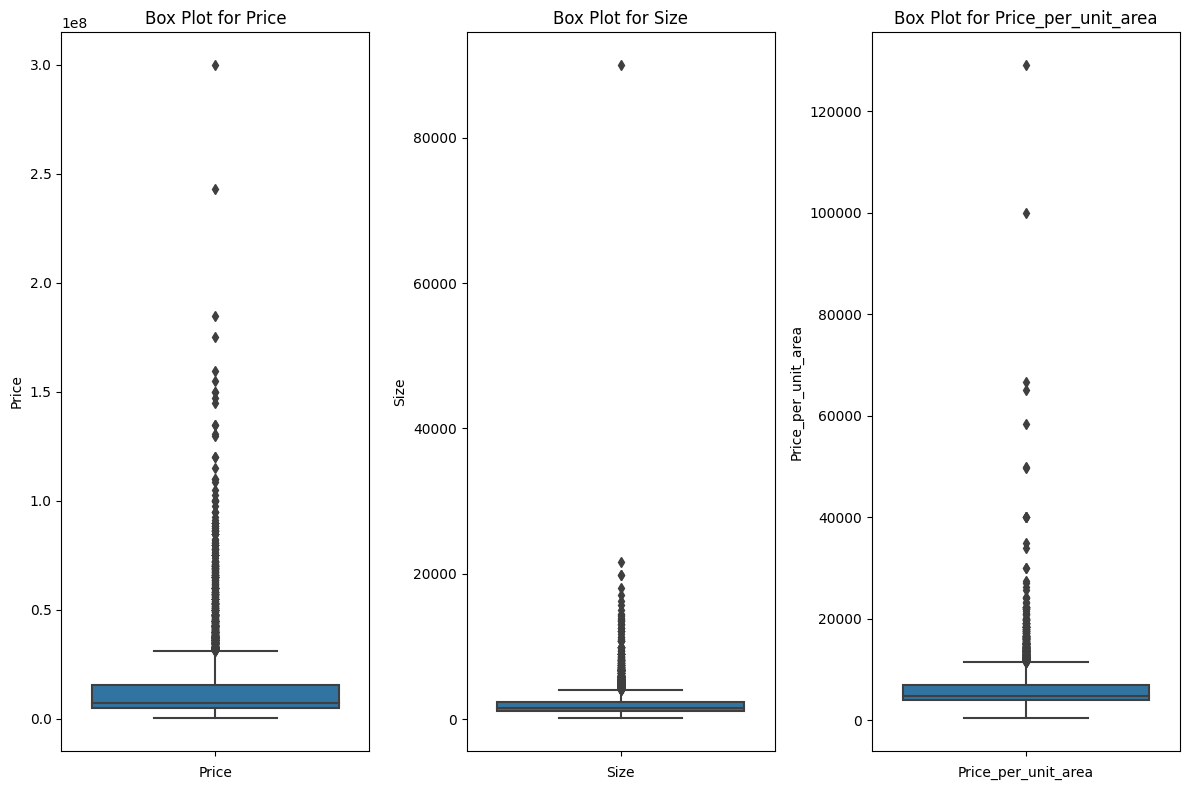

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select three numeric columns
numeric_columns = ['Price', 'Size', 'Price_per_unit_area']

# Create box plots for outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


Interpretation:

Price: Outliers in the 'Price' variable might indicate properties with significantly higher or lower prices compared to the majority.
Size: Outliers in the 'Size' variable may represent properties with exceptionally large or small sizes.
Price_per_unit_area: Outliers in 'Price_per_unit_area' could highlight properties with unusually high or low prices relative to their size.

3. For two variables, calculate the outliers using both the interquartile range and the standard deviation from the mean. Are the results different? Interpret them.

In [114]:
import numpy as np

# Choose two variables
variables = ['Price', 'Size']

# Calculate IQR for each variable
for variable in variables:
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers using IQR
    outliers_iqr = df[(df[variable] < Q1 - 1.5 * IQR) | (df[variable] > Q3 + 1.5 * IQR)]

    print(f'Outliers using IQR for {variable}: {len(outliers_iqr)}')


Outliers using IQR for Price: 673
Outliers using IQR for Size: 547


In [115]:
# Calculate mean and standard deviation for each variable
for variable in variables:
    mean = df[variable].mean()
    std_dev = df[variable].std()

    # Identify outliers using standard deviation
    outliers_std_dev = df[(df[variable] < mean - 2 * std_dev) | (df[variable] > mean + 2 * std_dev)]

    print(f'Outliers using standard deviation for {variable}: {len(outliers_std_dev)}')


Outliers using standard deviation for Price: 294
Outliers using standard deviation for Size: 195


Interpretation:
Interquartile Range (IQR): Identifies outliers based on the spread of the middle 50% of the data. Outliers are those data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

Standard Deviation from Mean: Identifies outliers based on how far a data point is from the mean. Outliers are those data points that fall below mean - 2 * std_dev or above mean + 2 * std_dev.

It's common for these methods to yield slightly different results. IQR is robust to extreme values, focusing on the central tendency of the data. On the other hand, using standard deviation can be sensitive to outliers.

4. If there are outliers, delete them (if there is a lot of data) or replace them with the mean/median (if there is little data) and see how the measures of the central tendency in the variable under consideration have changed.

In [116]:
# Identify and remove outliers using IQR
for variable in variables:
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1

    # Define the range for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]

# Display the updated DataFrame without outliers
df.head()


Property_type  Property_status  Price_per_unit_area  \
0              0              1.0                 4285   
2              0              0.0                 5752   
3              0              0.0                 2486   
4              0              1.0                 5324   
5              0              1.0                 2593   

   Property_building_status  City_name  No_of_BHK  Size  is_furnished  \
0                         1          7          3  1750             0   
2                         1          7          3  2295             0   
3                         1          7          2   918             0   
4                         1          7          3  1760             0   
5                         1          7          2  1305             0   

        Price  Posted_days_ago Price_Category Age_Group  
0   7500000.0                1         Luxury       New  
2  13200840.0                2         Luxury       New  
3   2283000.0                5         Luxury       New  
4   9371000.0                8         Luxury       New  
5   3385000.0                9         Luxury       New

In [117]:
# Calculate the new mean and median for each variable
for variable in variables:
    mean_after_removal = df[variable].mean()
    median_after_removal = df[variable].median()

    print(f'After removing outliers, the mean for {variable} is {mean_after_removal:.2f} and the median is {median_after_removal:.2f}')

After removing outliers, the mean for Price is 8545873.16 and the median is 6550181.00
After removing outliers, the mean for Size is 1587.83 and the median is 1475.00


5. If there are missing values in the data, specify in which variables and how many of them. Replace or remove missing val

In [118]:
df.isnull().sum()

Property_type               0
Property_status             0
Price_per_unit_area         0
Property_building_status    0
City_name                   0
No_of_BHK                   0
Size                        0
is_furnished                0
Price                       0
Posted_days_ago             0
Price_Category              0
Age_Group                   0
dtype: int64

Excellent correlation (modulo) - [0.8, 1.0]

Positive: Intense positive communication. As one variable increases, the other also increases.
Negative: Intense negative communication. As one variable increases, the other decreases.
Good correlation (modulo) - [0.6, 0.8)

Positive: Moderate positive association.
Negative: Moderate negative relationship.
Moderate correlation (modulo) - [0.4, 0.6)

Positive: Weak positive connection.
Negative: Weak negative connection.
Weak correlation (modulo) - [0.2, 0.4)

Positive: Very weak positive connection.
Negative: Very weak negative connection.
Lack of correlation (modulo) - [0, 0.2)

Close to zero: There is no linear relationship between the variables.
Example:

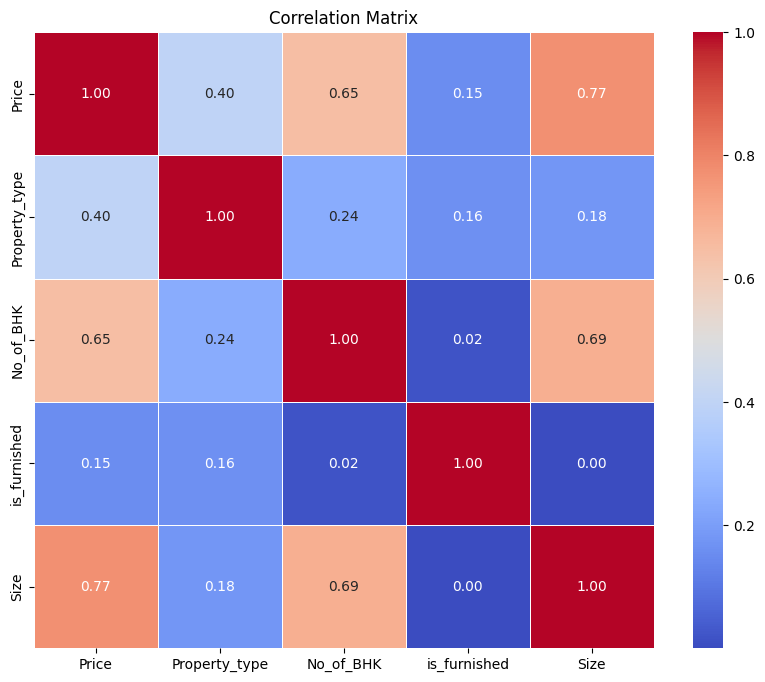

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = df[['Price', 'Property_type', 'No_of_BHK', 'is_furnished', 'Size']]

correlation_matrix = selected_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

8. Plot the scatter plots based on these features

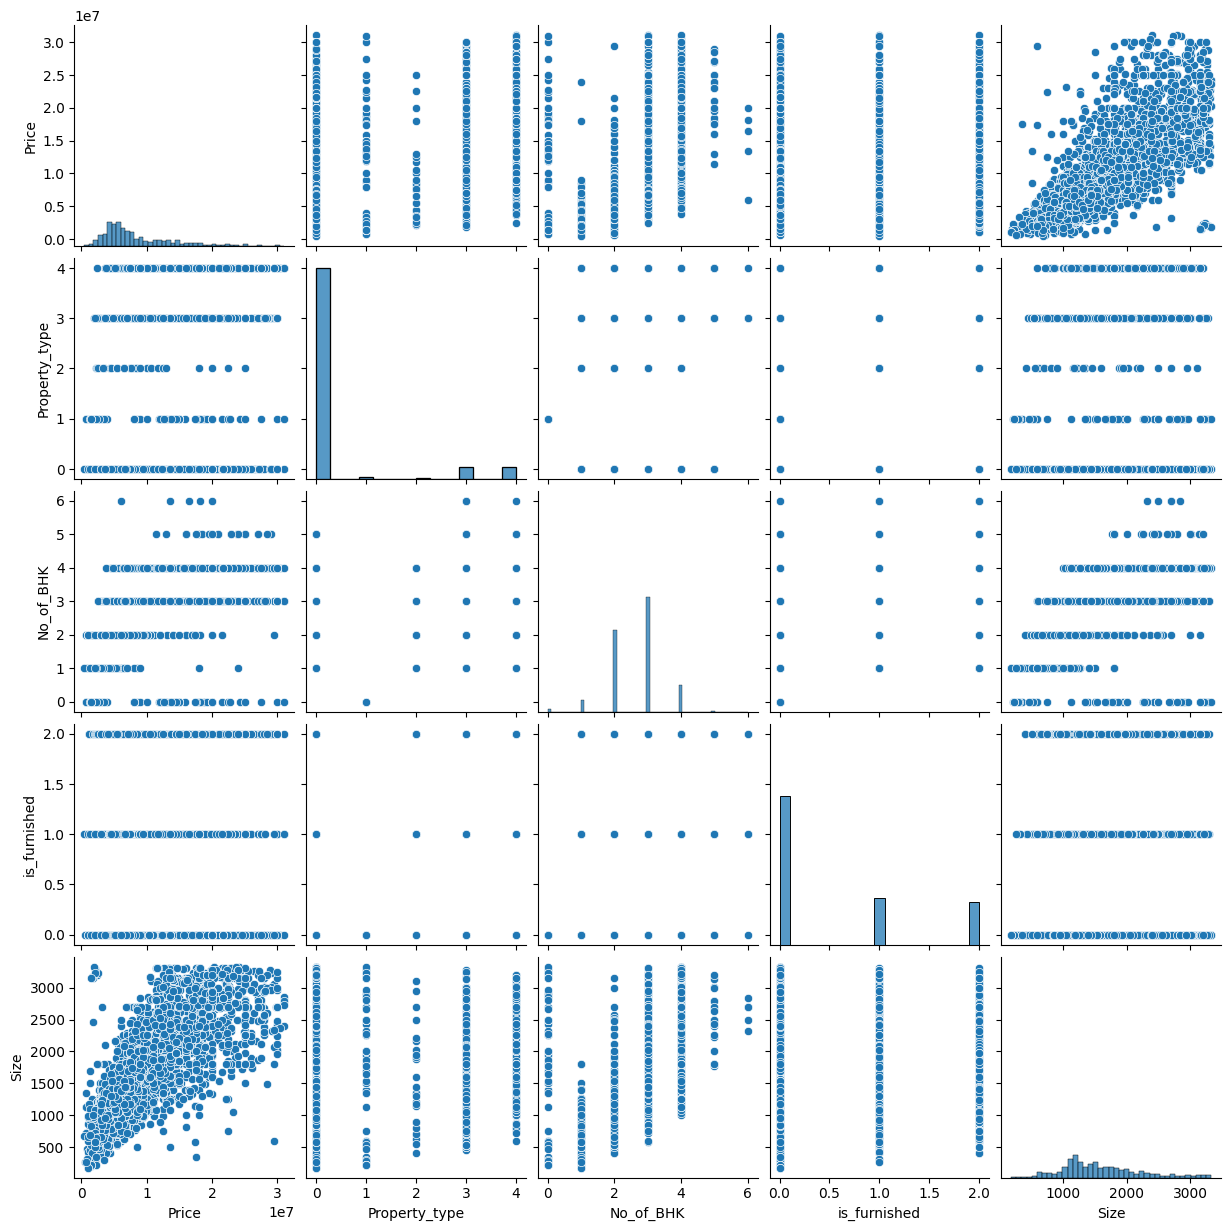

In [121]:
features = ['Price', 'Property_type', 'No_of_BHK', 'is_furnished', 'Size']

# Create a pair plot with scatter plots
sns.pairplot(df[features])
plt.show()


##Stage 4

In [168]:
print(df.columns)

Index(['Property_type', 'Property_status', 'Price_per_unit_area',
       'Property_building_status', 'City_name', 'No_of_BHK', 'Size',
       'is_furnished', 'Price', 'Posted_days_ago', 'Age_Group',
       'Price_Category'],
      dtype='object')


In [219]:
df.dtypes

Property_type                  int64
Property_status              float64
Price_per_unit_area            int64
Property_building_status       int64
City_name                      int64
No_of_BHK                      int64
Size                           int64
is_furnished                   int64
Price                        float64
Posted_days_ago                int64
Price_Category              category
Age_Group                   category
dtype: object

In [220]:
#encoding

In [221]:
df['Price_Category'] = df['Price_Category'].cat.codes.astype(int)
df['Age_Group'] = df['Age_Group'].cat.codes.astype(int)

In [222]:
df.dtypes

Property_type                 int64
Property_status             float64
Price_per_unit_area           int64
Property_building_status      int64
City_name                     int64
No_of_BHK                     int64
Size                          int64
is_furnished                  int64
Price                       float64
Posted_days_ago               int64
Price_Category                int64
Age_Group                     int64
dtype: object

In [ ]:
columns_to_check = ['Property_type', 'Property_status', 'Price_per_unit_area',
       'Property_building_status', 'City_name', 'No_of_BHK', 'Size',
       'is_furnished', 'Posted_days_ago', 'Price_Category',
       'Age_Group']

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Delete the rows with outliers
    df = df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]

In [270]:
df

Property_type  Property_status  Price_per_unit_area  \
0                   0              1.0                 4285   
2                   0              0.0                 5752   
3                   0              0.0                 2486   
4                   0              1.0                 5324   
5                   0              1.0                 2593   
...               ...              ...                  ...   
332091              0              1.0                 9826   
332092              0              1.0                 8568   
332093              0              1.0                 9861   
332094              0              1.0                 8813   
332095              0              1.0                 9859   

        Property_building_status  City_name  No_of_BHK  Size  is_furnished  \
0                              1          7          3  1750             0   
2                              1          7          3  2295             0   
3                              1          7          2   918             0   
4                              1          7          3  1760             0   
5                              1          7          2  1305             0   
...                          ...        ...        ...   ...           ...   
332091                         1          0          1   346             0   
332092                         1          0          1   426             0   
332093                         1          0          1   360             0   
332094                         1          0          2   590             0   
332095                         1          0          1   358             0   

             Price  Posted_days_ago  Price_Category  Age_Group  
0        7500000.0                1               2          0  
2       13200840.0                2               2          0  
3        2283000.0                5               2          0  
4        9371000.0                8               2          0  
5        3385000.0                9               2          0  
...            ...              ...             ...        ...  
332091   3400000.0                4               2          0  
332092   3650000.0                4               2          0  
332093   3550000.0                4               2          0  
332094   5200000.0                4               2          0  
332095   3529577.0                4               2          0  

[201124 rows x 12 columns]

In [223]:
#correlation matrix for all features

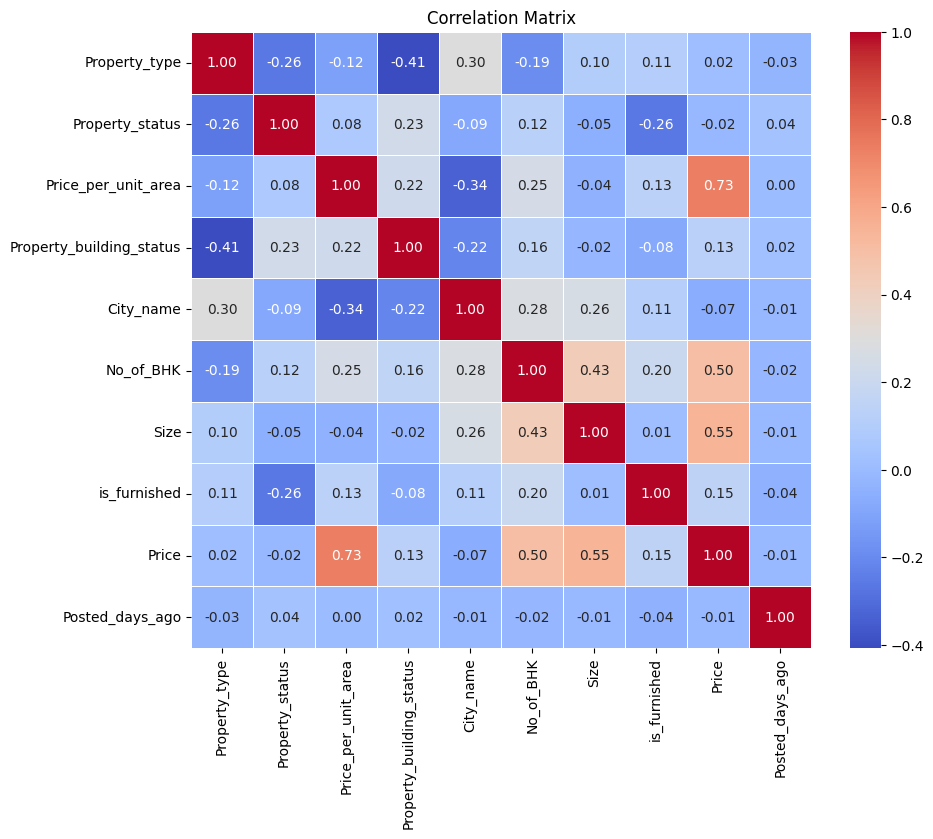

In [255]:
selected_features = df[['Property_type', 'Property_status', 'Price_per_unit_area',
       'Property_building_status', 'City_name', 'No_of_BHK', 'Size',
       'is_furnished', 'Price', 'Posted_days_ago']]

correlation_matrix = selected_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

1. Define the problem task (whether it is regression or binary classification) depending on your target that you're going to predict


Problem Task Definition:

The problem task is regression. The goal is to predict the prices of apartments. In a regression task, the target variable is continuous, and in this case, it's the price of apartments. The model aims to provide a numerical output representing the predicted price based on various features.

2. Apply machine learning algorithm (linear/logistic regression)
- 1st experiment data: take all numeric and encoded categorical features
- 2nd experiment data: take top-3 (top-5) features with the highest correlation with target
- Split your data into train and test into 80% and 20% proportion correspondingly
- Apply ML algorithm for experiments 1 and 2
- calculate quality metrics (R^2, MSE for linear regression, pseudo R^2 in logistic regression)
- compare results of two models (where the (pseudo) R^2 is higher (or MSE is the lowest for regression task), the better model is)
- Conclusion (Interpreation of obtained results and of the whole project in a free form)

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [256]:
features = ['Property_type', 'Property_status', 'Price_per_unit_area',
       'Property_building_status', 'City_name', 'No_of_BHK', 'Size',
       'is_furnished', 'Posted_days_ago']

In [257]:
X = df[features]
y = df['Price']

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [259]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [260]:
y_pred = linear_reg_model.predict(X_test)

In [261]:
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R^2 Score: 0.8801373290768792
Mean Squared Error: 6504101308402.294


In [262]:
#TOP 3 features

In [264]:
features = ['Price_per_unit_area', 'No_of_BHK', 'Size']

In [265]:
X = df[features]
y = df['Price']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [267]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [268]:
y_pred = linear_reg_model.predict(X_test)

In [269]:
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R^2 Score: 0.8740726359145284
Mean Squared Error: 6833189409213.967


Comparison of two models:

1. Using all the signs:

R^2 Score: 0.8801
Mean Squared Error: 6,504,101,308,402.294
2. Only the top 3 attributes (Price_per_unit_area, No_of_BHK, Size):

R^2 Score: 0.8741
Mean Squared Error: 6,833,189,409,213.967
Both models demonstrated a high level of explained variance (R^2 Score) and comparable mean square error (MSE) values. However, the second model, using only three features, showed almost identical results in terms of performance metrics than the model using all features.

In terms of data load:

The first model (all signs):
Uses more features, which may require more resources for training and predictions.
The second model (top 3 features):
It uses only three attributes, which reduces the computational load.
Thus, from the point of view of data processing convenience, the second model is preferable, since it provides almost identical prediction quality using fewer features. This can be especially important in cases where resources are limited or more efficient use of data is required.

Significance and Relevance:

Predicting apartment prices is highly relevant and crucial for various stakeholders, including buyers, sellers, real estate agents, and investors. Here's why:

Buyer Decision-Making: Prospective buyers can benefit from accurate price predictions to make informed decisions about whether a property is within their budget and to understand the fair market value.

Seller Pricing Strategy: Sellers can optimize their pricing strategies by understanding the factors that influence property prices, ensuring that they set competitive and realistic listing prices.

Real Estate Investments: Investors rely on accurate price predictions to identify potential opportunities for profitable real estate investments, whether it's buying, selling, or renting properties.

Market Analysis: Real estate professionals and policymakers can use predictive models to analyze market trends, understand demand and supply dynamics, and make informed decisions about urban development and housing policies.

Risk Management: Banks and financial institutions can use accurate price predictions to assess the risk associated with mortgage loans, helping in the management of financial portfolios.

In summary, predicting apartment prices has far-reaching implications across the real estate industry, providing valuable insights for both individuals and organizations involved in property transactions and investments.